# Satellite Climatology: Remote Sensing of a Changing Climate: Exercises - Final task
## Climatological analysis of global aerosol patterns, seasonal cycles, trends and anomalies

Hendrik Andersen, contact: hendrik.andersen@kit.edu

To learn more about what atmospheric aerosols are, what their impacts on human health and climate are and how they can be retrieved from space, please visit:
https://earthobservatory.nasa.gov/features/Aerosols

## Submitted By:
## Name: Sudur Bhattarai  
## Student ID: 2514652 
## Program: M.Sc. in Remote Sensing and Geoinformatics

In [2]:
# import relevant modules first
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from trend_calculation import xr_trend as trend

# define the path to the data
dataDir = "D:/MasterRSGI/Subjects/Summer_Sem_2023/Satellite_Climatology/Exercises/Data/"

# open the data
ds = xr.open_dataset(dataDir+"2001_2020_modis_monthly_l3_teaching.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:    (time: 228, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 2001-01-15 2001-02-15 ... 2020-12-15
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    CLF        (time, latitude, longitude) float64 ...
    DER        (time, latitude, longitude) float64 ...
    LWP        (time, latitude, longitude) float64 ...
    IWP        (time, latitude, longitude) float64 ...
    CTT        (time, latitude, longitude) float64 ...
    CTH        (time, latitude, longitude) float64 ...
    AOD        (time, latitude, longitude) float64 ...

Tasks:
1) Plot maps of the climatological state of aerosol optical depth (AOD), its variability and seasonal cycles to characterize the general patterns of atmospheric aerosol particles. Describe which regions are hotspots of AOD and which particle types you would suspect to be dominant in which regions.
2) Conduct a global trend analysis of AOD: Where on Earth is the aerosol loading increasing, where is it decreasing? Test for significance/only illustrate significant changes on your map. Describe what you think could be the reasons for the observed aerosol trends and see if you can find a primary literature source (paper) that confirms or contradicts your findings and interpretation and provide the reference of the paper. 
3) During the initial COVID-19 lockdowns (~Feb-May 2020), a dramatic reduction in human activities and human aerosol emissions have been reported. Conduct an anomaly analysis for spring (e.g. Feb-April/May or MAM) of the main COVID-year 2020 to answer the following scientific question: *Did the reduction in anthropogenic aerosol emissions during the initial COVID-19 lockdowns lead to a significant reduction in satellite-observed AOD?* To answer this question, calculate the differences between spring 2020 and the "climatological" expectation for the AOD at this time of year and quantify how large the differences are in terms of z scores/standard deviations? Describe the results and discuss: would additional trend information (e.g. removing the trend from the data) be needed for a more accurate analysis of COVID-related changes in aerosol? 

For each task, please provide code cells where the analysis is conducted as well as markdown cells in which you describe and discuss your results. Description and discussion of the results is important to pass the exercise, as with this discussion, you can show that you have understood the contents of this course. 

## Q.No. 1 Plot maps of the climatological state of aerosol optical depth (AOD), its variability and seasonal cycles to characterize the general patterns of atmospheric aerosol particles. Describe which regions are hotspots of AOD and which particle types you would suspect to be dominant in which regions.

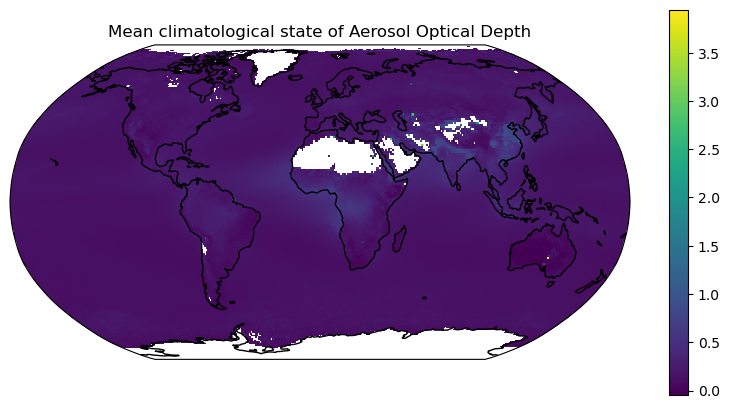

In [40]:
# Plotting the mean climatological state of aerosol optical depth (AOD)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
im = ax.pcolormesh(ds.longitude, ds.latitude, ds.AOD.mean(dim="time"), transform=ccrs.PlateCarree())
plt.colorbar(im)
plt.title('Mean climatological state of Aerosol Optical Depth')
plt.show()

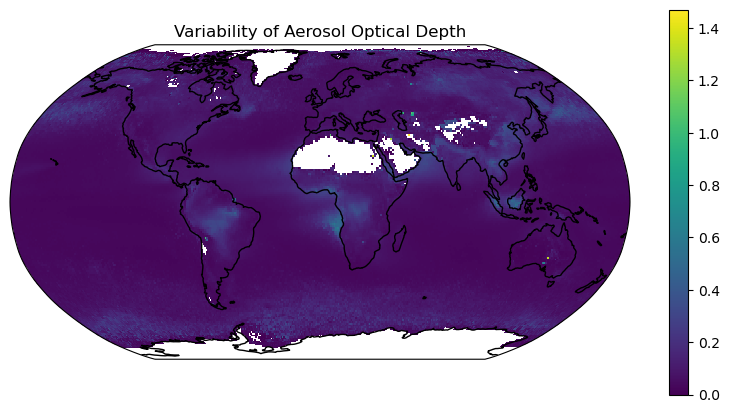

In [41]:
# Plotting the variability of climatological state of aerosol optical depth (AOD)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
im = ax.pcolormesh(ds.longitude, ds.latitude, ds.AOD.std("time"), transform=ccrs.PlateCarree())
plt.colorbar(im)
plt.title('Variability of Aerosol Optical Depth')
plt.show()

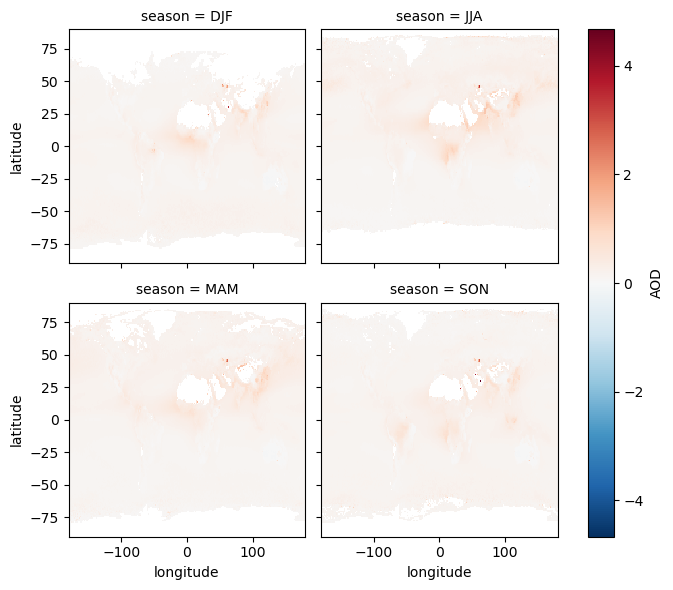

In [42]:
#plotting the climatological seasonal cycle of Aerosol Opticacl Depth
ds.AOD.groupby('time.season').mean(dim='time').plot.imshow(col='season', col_wrap = 2)

Text(0.5, 0.98, 'climatological seasonal cycle of AOD')

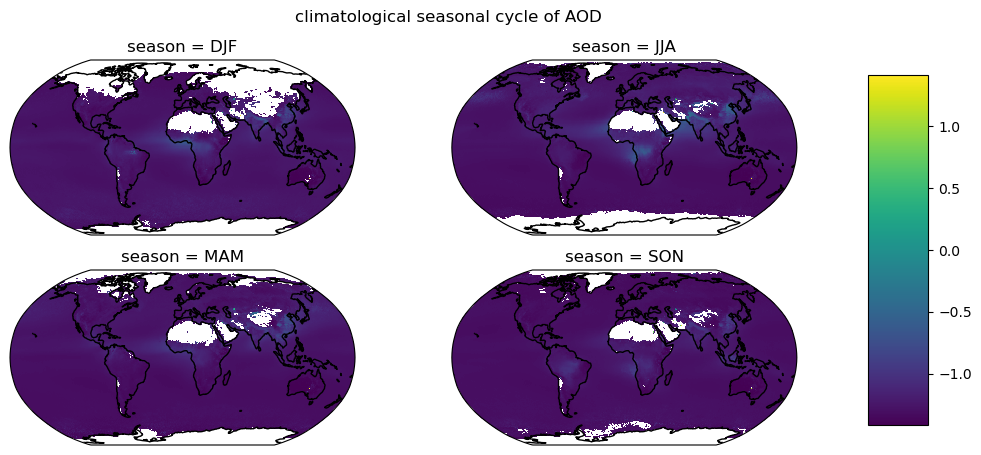

In [88]:
#plotting the climatological seasonal cycle of Aerosol Opticacl Depth to enhance the better visuaization

# ds.AOD.groupby('time.season').mean(dim='time').plot.imshow(col='season', col_wrap = 2)

# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111, projection=ccrs.Robinson())
# ax.coastlines()
# im = ax.pcolormesh(ds.longitude, ds.latitude, ds.AOD.std("time"), transform=ccrs.PlateCarree())
# plt.colorbar(im)
# plt.title('Variability of Aerosol Optical Depth')
# plt.show()


# to enhance the better visualization
fig=plt.figure(figsize=(12, 5))
data = ds.AOD.groupby('time.season').mean(dim='time')

ax1=fig.add_subplot(2,2,1,projection=ccrs.Robinson())
im1 = ax1.pcolormesh(ds.longitude, ds.latitude, data[0,:,:], transform=ccrs.PlateCarree())
ax1.coastlines()
plt.title("season = DJF")

ax2=fig.add_subplot(2,2,2,projection=ccrs.Robinson())
im2 = ax2.pcolormesh(ds.longitude, ds.latitude, data[1,:,:], transform=ccrs.PlateCarree())
ax2.coastlines()
plt.title("season = JJA")

ax3=fig.add_subplot(2,2,3,projection=ccrs.Robinson())
im3 = ax3.pcolormesh(ds.longitude, ds.latitude, data[2,:,:], transform=ccrs.PlateCarree())
ax3.coastlines()
plt.title("season = MAM")

ax4 = fig.add_subplot(2,2,4,projection=ccrs.Robinson())
im4 = ax4.pcolormesh(ds.longitude, ds.latitude, data[3,:,:], transform=ccrs.PlateCarree())
ax4.coastlines()
plt.title("season = SON")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.suptitle("climatological seasonal cycle of AOD")

## Discussion: Regions of  hotspots of AOD and which particles are suspected to be dominant in theses regions.

Hotspots of AOD: Central Africa, Amazon Basin, Indo-Gangetic plain(area covered by Bangladesh, northern India, and northern Pakistan), China (eastern and western part), Thailand, Indonesia, Russia, Canada, Western US

Amazon Basin and Central Africa: slash-and-burn agriculture in the Amazon and Central Africa releases large amounts of smoke and soot. Also due to desert dust from Sahara in Central Africa

Indo-Gangetic plain: aerosol layer is comprised of complex mixtures of dust blowing from the Thar Desert and pollution from the densely populated plain, especially during the pre-mansoon

Eastern China:  fast-growing cities such as Beijing produce heavy blankets of aerosol due to industrial pollution

Western China: produce layers of aerosol due to desert dust blown out of Gobi desert and Takla Makan Desert

Russia, Canada, Western US: due to fires, some sparked by lightning and some by human activity, leave large patches of forest ablaze during summers

India, Thailand, Indonesia: due to industrial pollution, releases a heavy aerosol


## Q.No. 2 Conduct a global trend analysis of AOD: Where on Earth is the aerosol loading increasing, where is it decreasing? Test for significance/only illustrate significant changes on your map. Describe what you think could be the reasons for the observed aerosol trends and see if you can find a primary literature source (paper) that confirms or contradicts your findings and interpretation and provide the reference of the paper.

In [54]:
from trend_calculation import xr_trend as trend
x=trend(ds.AOD) #trend function returns the trend of Aerosol Optical Depth from dataset ds

In [55]:
x

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360)
Coordinates:
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    slope      (latitude, longitude) float64 nan nan nan nan ... nan nan nan nan
    pval       (latitude, longitude) float64 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    intercept  (latitude, longitude) float64 nan nan nan nan ... nan nan nan nan

In [56]:
x.slope

<xarray.DataArray 'slope' (latitude: 180, longitude: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    units:    units / day

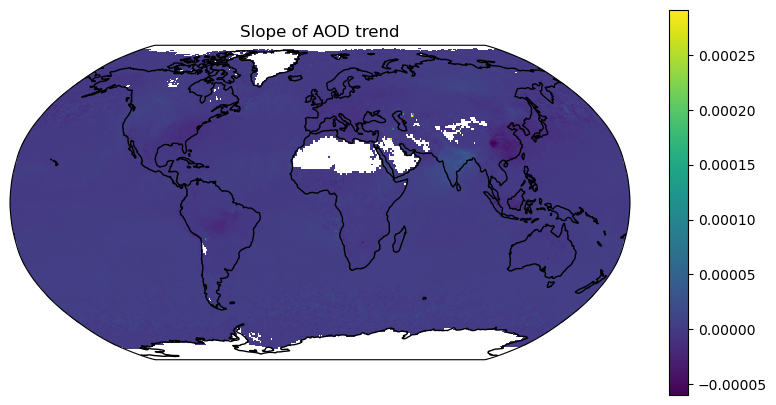

In [57]:
# Plotting the slope of AOD trend
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
im = ax.pcolormesh(x.longitude, x.latitude, x.slope, transform=ccrs.PlateCarree())
plt.colorbar(im)
plt.title('Slope of AOD trend')
plt.show()

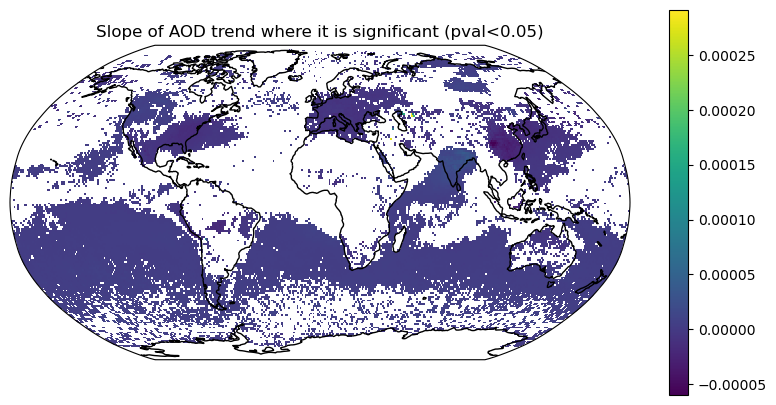

In [58]:
# Plotting the slope of AOD trend where it is significant (pval<0.05)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
im = ax.pcolormesh(x.longitude, x.latitude, x.slope.where(x.pval<0.05), transform=ccrs.PlateCarree())
plt.colorbar(im)
plt.title('Slope of AOD trend where it is significant (pval<0.05)')
plt.show()

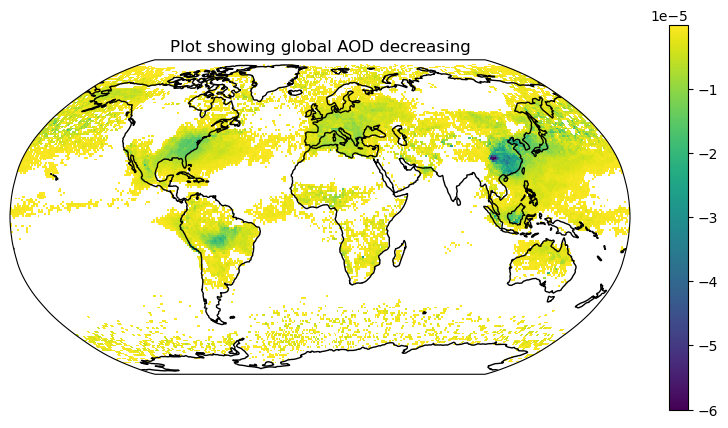

In [59]:
#Plotting the regions with AOD decreasing
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
im = ax.pcolormesh(x.longitude, x.latitude, x.slope.where(x.slope<0), transform=ccrs.PlateCarree())
plt.colorbar(im)
plt.title('Plot showing global AOD decreasing')
plt.show()

AOD decreasing: China, South-eastern USA, Brazil, Indonesia, Malyasia

Discussion (My Point of View):

i. China: As China is the country of sand, in my opinion the trend of Aerosol loading had been decreased in this time period here due to increase in vegetation, long-term startegies taken by the government to reduce the sand activities via creating low wind energy environment.

ii. South-eastern USA: The decrease in the forest fires perhaps can be the decrease in the trend of aerosol loading in South-eastern US in this time period from 2001 to 2020.

Findings:
i. China: Wang et al., 2021 in their paper mentioned that through large-scale vegetation restoration projects, it contributed to the land-use change to the recent inhibition of dust emission, in addition to the development of low wind energy environmnet. The widespread vegetation recovery in the dust source regions can exert strong feedbacks through increased surface roughness and inhibited near-surface wind speed, thereby reducing the erodibility of the top soil.This consequently led to the no or low relaese of dust aerosols into the atmosphere. My findings and interpretations matched with the findings to that of paper.

Reference: Wang, S., Yu, Y., Zhang, X. X., Lu, H., Zhang, X. Y., & Xu, Z. (2021). Weakened dust activity over China and Mongolia from 2001 to 2020 associated with climate change and land-use management. Environmental Research Letters, 16(12). https://doi.org/10.1088/1748-9326/ac3b79


ii. South-eastern USA: (Greskowiak, 2014) decribed the cause for the decrease in the trend of aerosol loading between 1992 and 2013 in South-Eastern USA was decrease in aerosol sulfate mass and organic aerosol. In other words, emission reductions in anthropogenic precursors and the volatile organic compounds were responsibe for lower trend of aerosol loading in the given time frame, which partially matches with my findings (fire {was the my prediction} do relase sulpahate mass) and interpretation.

Reference: Greskowiak, J. (2014). Geophysical Research Letters. Geophysical Prospecting, April, 6413–6419. https://doi.org/10.1002/2014GL061184.Received

I dont find the paper on the aerosol trend from 2013 to 2021 in case of  South-eastern USA.

I dont't find the country specific trend analysis of aersol in the give time frame for Brazil, Indonesia, Malyasia.

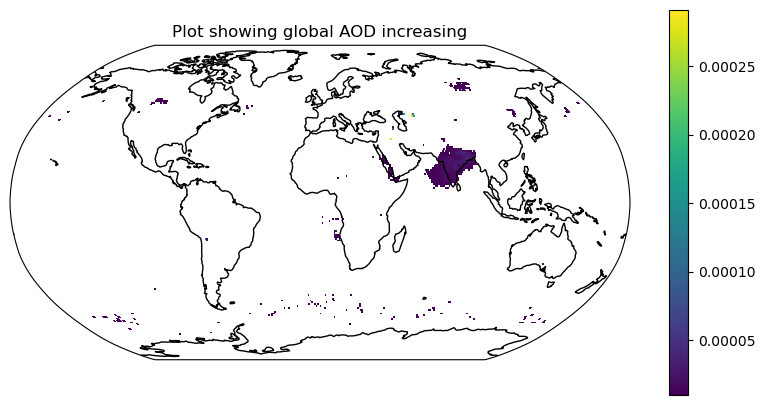

In [60]:
#Plotting the regions with AOD increasing
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
im = ax.pcolormesh(x.longitude, x.latitude, x.slope.where(x.slope>0.00001), transform=ccrs.PlateCarree())
plt.colorbar(im)
plt.title('Plot showing global AOD increasing')
plt.show()

AOD increasing: India, Russia

Discussion (My Point of View):

i. India: Aerosol trend in India increased during this period(2001-01-15 2001 to 2020), due to increased number of industrial activities because of industralization and the increased number of population density in the country. 
    
ii. Russia: Perhaps due to the nuclear developemnets of weapons, biomass burning. Russia saw a a rapid economic development in terms of industrial activities, energy consumption during this time period. 
    
Findings from the research Papers:

i. India: Mehta et al., 2022 studied the changing trends of aerosol loading over three zones of indian region(Indo-Gangetic Plains, South-India and desert zone) during 17 year time period from 2005 to 2021. To simplify, the linear trend in AOD over the considered time frame was observed in two equal halves of 8 years each, one between 2005–2012 and the other between 2013–2021 (excluding 2020) to specifically see how the AOD trends have changed during recent years as compared to 2005–2012. Year 2020 was excluded as there was a nationwide lockdown over the Indian region [during March, April and May (MAM)] due to Covid-19. And  they found an increasing trends of AOD for zones selected in Indo-Gangetic Plains and South-India, whereas for the desert zone, AOD trend contrastingly become negative (2005–2012) to positive (2013–2021). Last but not the least, as per the paper, combination of antropogenic factors(biomass burning, vehicular emissions, industrial activities) as a result  of rapid urbanization, industralization and growing increasing demands were the possible causes of the increasing aersol trend. Not only this but also, the trasportation of the mineral dust from Thar desert by summer winds was responsible for increasing aerosol in Pre-Mansoon Season. Similarly, higher temperatures during pre-mansoon months played an equal role in heating and lifting the loose soil with the association of the wind. My findings and interpreattions macthed with that from the paper.

Reference: Mehta, M., Sharma, P., & Chauhan, P. (2022). Changing Trends of Aerosol Loadings Over Three Major Zones of Indian Region During the Last Seventeen Years (2005–2021). Journal of the Indian Society of Remote Sensing, 50(7), 1405–1408. https://doi.org/10.1007/s12524-022-01533-8

ii. Russia: I don't find the literatures on AOD trend in the given time frame (2001 to 2020) for Russia.

## task3
During the initial COVID-19 lockdowns (~Feb-May 2020), a dramatic reduction in human activities and human aerosol emissions have been reported. Conduct an anomaly analysis for spring (e.g. Feb-April/May or MAM) of the main COVID-year 2020 to answer the following scientific question: Did the reduction in anthropogenic aerosol emissions during the initial COVID-19 lockdowns lead to a significant reduction in satellite-observed AOD? To answer this question, calculate the differences between spring 2020 and the "climatological" expectation for the AOD at this time of year and quantify how large the differences are in terms of z scores/standard deviations? Describe the results and discuss: would additional trend information (e.g. removing the trend from the data) be needed for a more accurate analysis of COVID-related changes in aerosol?

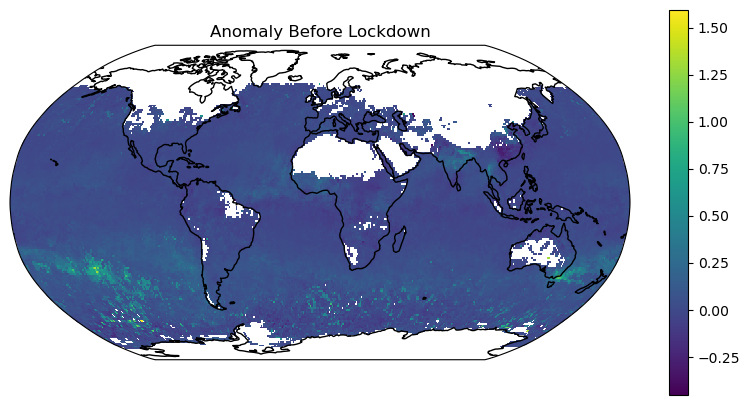

In [71]:
#Anomaly analysis before lockdown (is analyzed for the month of January 2020)

AOD = ds.AOD.groupby('time.month')
AOD_Mean = ds.AOD.groupby('time.month').mean(dim='time')

#Anomaly of AOD before lockdown
Anomaly_AOD = AOD - AOD_Mean
Anomaly_AOD_2020_Jan = Anomaly_AOD.sel(time='2020-01')

#plotting anomaly of AOD before lockdown
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
im = ax.pcolormesh(Anomaly_AOD_2020_Jan.longitude, Anomaly_AOD_2020_Jan.latitude, Anomaly_AOD_2020_Jan.values[0], transform=ccrs.PlateCarree())
plt.colorbar(im)
plt.title("Anomaly Before Lockdown")
plt.show()

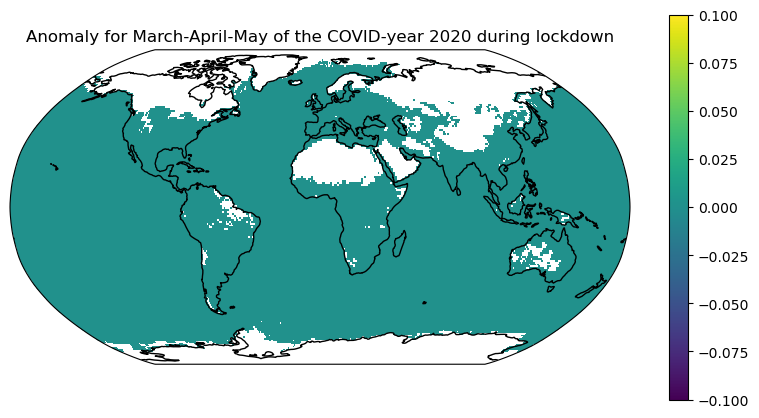

In [72]:
#Conduct an anomaly analysis for spring (e.g. Feb-April/May or MAM) of the main COVID-year 2020

#AOD for March, April, May of the main COVID-year 2020
AOD_2020_MAM = ds.AOD.sel(time=slice("2020-03-1", "2020-05-31")).groupby('time.month')

#Mean AOD for March, April, May of the main COVID-year 2020
AOD_2020_MAM_Mean = ds.AOD.sel(time=slice("2020-03-1", "2020-05-31")).groupby('time.month').mean(dim='time')

#Anomaly of AOD for March, April, May of the main COVID-year 2020
Anomaly_AOD_2020_MAM = AOD_2020_MAM - AOD_2020_MAM_Mean

#plotting anomaly of AOD for March, April, May of the main COVID-year 2020
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
im = ax.pcolormesh(Anomaly_AOD_2020_MAM.longitude, Anomaly_AOD_2020_MAM.latitude, Anomaly_AOD_2020_MAM.values[0], transform=ccrs.PlateCarree())
plt.colorbar(im)
plt.title("Anomaly for March-April-May of the COVID-year 2020 during lockdown")
plt.show()

## Discussion
The higher AOD's anomalies values in the southern ocean, Central Africa, Indo-Gangetic plain, Thailand, Indonesia, South-western Australia, North-western US before lockdow, which were the hotspot of AOD have experience a significant drop during the period of lockdown which we can see in the plot above. During lockdown, the industries/factories were closed, there were less/absolutely no vehicles at road, so we can conclude that the anthropogenic aerosol emissions were reduced during this time period. Nevertheless, other metrological parameters also play the significance role for this low AOD values during this time period but it is also, for sure, the reduction in the anthropogenic aerosol emissions.

In [81]:
#calculate the differences between spring 2020 and the "climatological" expectation for the AOD at this time of year 
#and
#quantify how large the differences are in terms of z scores/standard deviations

AOD_2020_MAM = ds.AOD.sel(time=slice("2020-03-1", "2020-05-31")).groupby('time.month') # March, April and May are taken as spring here
climatological_expectation = ds.AOD.sel(time=slice("2001-01-1", "2020-12-31")).groupby('time.month').mean(dim='time')
difference = AOD_2020_MAM - climatological_expectation
zx = difference
zmean = zx.mean(dim ='time')
zstd = zx.std(dim ='time')
z = (zx - zmean)/zstd
z

<xarray.DataArray 'AOD' (time: 3, latitude: 180, longitude: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time       (time) datetime64[ns] 2020-03-15 2020-04-15 2020-05-15
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    month      (time) int64 3 4 5

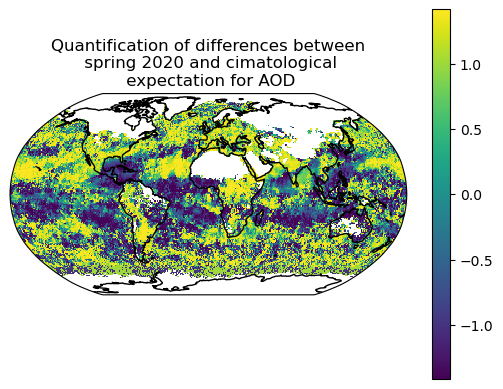

In [86]:
#plotting the differences between spring 2020
#and
#the "climatological" expectation for the AOD at this time of year in terms of z score
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
im = ax.pcolormesh(z.longitude, z.latitude, z.values[0], transform=ccrs.PlateCarree())
plt.colorbar(im)
plt.title("Quantification of differences between\n spring 2020 and cimatological\n expectation for AOD")
plt.show()

## Discussion
Southern ocean, Central Africa, Indo-Gangetic plain, Thailand, Indonesia, USA, Chile, most of the EU nations which were the emitter of anthropogenic aerosol, experienced the larger deviations from the expected "climatological" value for the AOD in the spring 2020. This is the effect of the lockdown and from this we can conclude that the  anthropogenic aerosol emissions during the initial COVID-19 lockdowns led to a significant reduction in satellite-observed AOD from expected climatological value for AOD in this time period.